In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi
from scipy.sparse import csr_matrix, csc_matrix, linalg as sla
from functools import partial

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

## Build a function that generates some other shape

In [2]:
# Probably the best idea is to start with parametrisable shapes and then calculate the closest point to the edge.

def generate_curve(x,y,npoints=1000):
    'x and y are functions'
    theta = np.linspace(0, 2*np.pi, npoints)
    return (x(theta),y(theta))
    
def generate_shape(x,y,npoints=1000):
    'x and y are functions'
    theta = np.linspace(0, 2*np.pi, npoints)
    unique_points = np.unique(np.stack((np.round(x(theta)),np.round(y(theta)))), axis = 1)

    return (unique_points[0],unique_points[1])

def elipse_x(R,theta):
    return R*np.cos(theta) 

def elipse_y(R,theta):
    return R*np.sin(theta)

radius1 = 15
radius2 = 15
curve = generate_curve(partial(circle_x,radius1),partial(circle_y,radius2))
shape = generate_shape(partial(circle_x,radius1),partial(circle_y,radius2))


NameError: name 'circle_x' is not defined

114


/tmp/ipykernel_8087/2370434146.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


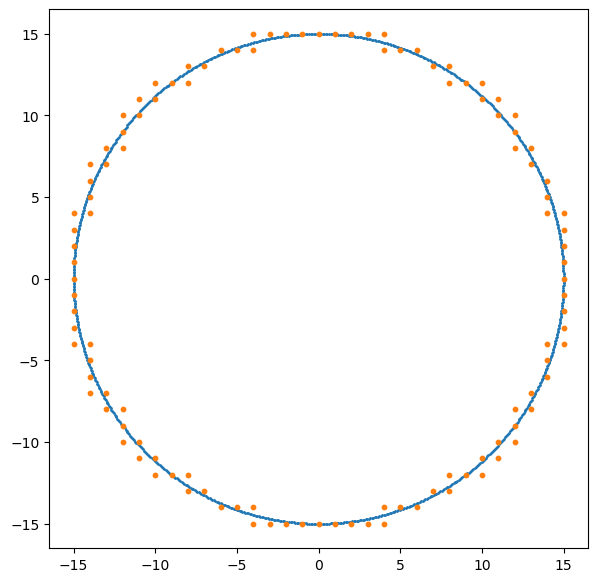

In [203]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.scatter(curve[0],curve[1], s = 1)
ax.scatter(shape[0],shape[1], s = 10)
ax.set_aspect('equal')
fig.show()

print(len(shape[1]))

## Generate shape works, now we should find the angle of the normal to the edge

In [193]:
theta = np.linspace(0, 2*np.pi, 1000)
X = radius1*np.cos(theta)
Y = radius2*np.sin(theta)

points = np.stack((np.round(X),np.round(Y)))
#print(points[:,:37])

unique_points, index, inverse, counts = np.unique(points,axis = 1, return_index=True, return_inverse=True, return_counts=True)

print(unique_points)
#print(inverse)
#print(counts)
def normal_angle():
    theta = np.linspace(0, 2*np.pi, 1000)
    phi = np.arctan((radius1/radius2)*np.tan(theta))
    return(phi)
  

[[-15. -15. -15. -15. -15. -15. -15. -15. -15. -14. -14. -14. -14. -14.
  -14. -14. -14. -13. -13. -13. -13. -12. -12. -12. -12. -12. -12. -11.
  -11. -11. -11. -10. -10. -10. -10.  -9.  -9.  -8.  -8.  -8.  -8.  -7.
   -7.  -6.  -6.  -5.  -5.  -4.  -4.  -4.  -4.  -3.  -3.  -2.  -2.  -1.
   -1.  -0.   0.   1.   1.   2.   2.   3.   3.   4.   4.   4.   4.   5.
    5.   6.   6.   7.   7.   8.   8.   8.   8.   9.   9.  10.  10.  10.
   10.  11.  11.  11.  11.  12.  12.  12.  12.  12.  12.  13.  13.  13.
   13.  14.  14.  14.  14.  14.  14.  15.  15.  15.  15.  15.  15.  15.
   15.  15.]
 [ -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.  -7.  -6.  -5.  -4.   4.
    5.   6.   7.  -8.  -7.   7.   8. -10.  -9.  -8.   8.   9.  10. -11.
  -10.  10.  11. -12. -11.  11.  12. -12.  12. -13. -12.  12.  13. -13.
   13. -14.  14. -14.  14. -15. -14.  14.  15. -15.  15. -15.  15. -15.
   15. -15.  15. -15.  15. -15.  15. -15.  15. -15. -14.  14.  15. -14.
   14. -14.  14. -13.  13. -13. -12.  12.  13. -12.

In [199]:
phi = normal_angle()

z = np.zeros(len(unique_points[1]),dtype = complex)
for i in range(len(unique_points[1])):
    count = 0
    for j,ind in enumerate(inverse):
        if ind == i:
            count+=1
            z[i] += np.exp(1j*phi[j])
    phi_short[i] = np.angle(z[i]/count)   
            
print(phi_short)

[ 2.45289516e-01  2.01263193e-01  1.35223708e-01  6.60394852e-02
 -3.44572305e-16 -6.60394852e-02 -1.35223708e-01 -2.01263193e-01
 -2.45289516e-01  4.49697447e-01  4.11960598e-01  3.39631638e-01
  2.79881628e-01 -2.79881628e-01 -3.39631638e-01 -4.11960598e-01
 -4.49697447e-01  5.53473781e-01  4.87434296e-01 -4.87434296e-01
 -5.53473781e-01  6.91842226e-01  6.44671165e-01  5.94355367e-01
 -5.94355367e-01 -6.44671165e-01 -6.91842226e-01  7.83039610e-01
  7.35868549e-01 -7.35868549e-01 -7.83039610e-01  8.80526469e-01
  8.33355409e-01 -8.33355409e-01 -8.80526469e-01  9.27697530e-01
 -9.27697530e-01  1.01889491e+00  9.78013329e-01 -9.78013329e-01
 -1.01575018e+00  1.08493440e+00 -1.08178966e+00  1.15726336e+00
 -1.15726336e+00  1.22959232e+00 -1.22959232e+00  1.32393444e+00
  1.28934233e+00 -1.28934233e+00 -1.32393444e+00  1.36796077e+00
 -1.36796077e+00  1.43714499e+00 -1.43714499e+00  1.50318447e+00
 -1.50318447e+00  1.38275025e+00 -1.38275025e+00 -1.50318447e+00
  1.50318447e+00 -1.43714

In [205]:
# Assuming a is your 2D array of coordinates
a = np.array([[1.2, 3.5, 1.2, 1.2, 3.5, 3.5, 1.2, 2.3, 4.6, 2.3, 5.7, 6.8, 7.9, 8.0, 9.1, 9.0],
              [2.3, 4.6, 2.3, 2.3, 4.6, 4.6, 2.3, 3.4, 5.7, 3.4, 6.5, 7.6, 8.7, 9.8, 10.9, 10.91]])
# Round the coordinates to integers
rounded_a = np.round(a)

# Find unique columns and their indices
unique_a, indices = np.unique(rounded_a, axis=1, return_inverse=True)

# The mask is the indices array
mask = indices

b = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

# Calculate the sum of elements in b that correspond to the same value in mask
sums = np.bincount(mask, weights=b)

# Calculate the count of elements in b that correspond to the same value in mask
counts = np.bincount(mask)

# Calculate the average of elements in b that correspond to the same value in mask
averages = sums / counts

# Create a new array where all elements that correspond to the same value in mask are averaged
new_array = averages[mask]

print(new_array)

[ 3.75        4.33333333  3.75        3.75        4.33333333  4.33333333
  3.75        9.          9.          9.         11.         12.
 13.         14.         15.5        15.5       ]


In [269]:
# Now let us put all of it together
def generate_elipse(r1,r2,npoints=1000):
    'Generates the set of points in the grid closest to an elipse with radii r1 and r2 and the angle of the normal vector.'
    theta = np.linspace(0, 2*np.pi, npoints)
    x = r1*np.cos(theta)
    y = r2*np.sin(theta)
    phi = np.arctan((r1/r2)*np.tan(theta))

    unique_points, inverse_indices = np.unique(np.stack((np.round(x),np.round(y))), axis = 1, return_inverse=True)
    phi_short = np.zeros(len(unique_points[1]))

    z = np.zeros(len(unique_points[1]),dtype = complex)
    for i in range(len(unique_points[1])):
        count = 0
        for j,ind in enumerate(inverse_indices):
            if ind == i:
                count+=1
                z[i] += np.exp(1j*phi[j])
        phi_short[i] = np.angle(z[i]/count)

    return unique_points.astype(int), phi_short


114


/tmp/ipykernel_8087/3650857326.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


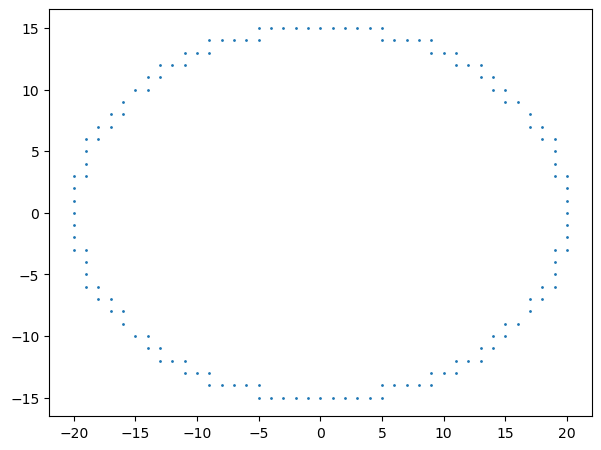

In [270]:
unique_points, phi = generate_elipse(20,15)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.scatter(unique_points[0],unique_points[1], s = 1)

ax.set_aspect('equal')
fig.show()

print(len(shape[1]))

In [275]:
def generate_elipse_zhenya(r1,r2,npoints=1000):
    'Generates the set of points in the grid closest to an elipse with radii r1 and r2 and the angle of the normal vector.'
    theta = np.linspace(0, 2*np.pi, npoints)
    x = r1*np.cos(theta)
    y = r2*np.sin(theta)
    phi = np.arctan((r1/r2)*np.tan(theta))
    b = np.exp(1j*phi)
    a = np.stack((x, y))
    unique_a, indices = np.unique(np.round(a), axis = 1, return_inverse=True)


    # The mask is the indices array
    mask = indices   
    
    # Calculate the sum of elements in b that correspond to the same value in mask
    sums_real = np.bincount(mask, weights=b.real)
    sums_imag = np.bincount(mask, weights=b.imag)
    
    # Calculate the count of elements in b that correspond to the same value in mask
    counts = np.bincount(mask)
    
    # Calculate the average of elements in b that correspond to the same value in mask
    averages_real = sums_real / counts
    averages_imag = sums_imag / counts
    averages = averages_real +averages_imag*1j
    

    
    return unique_a, np.angle(averages), mask, a


114


/tmp/ipykernel_8087/718091425.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


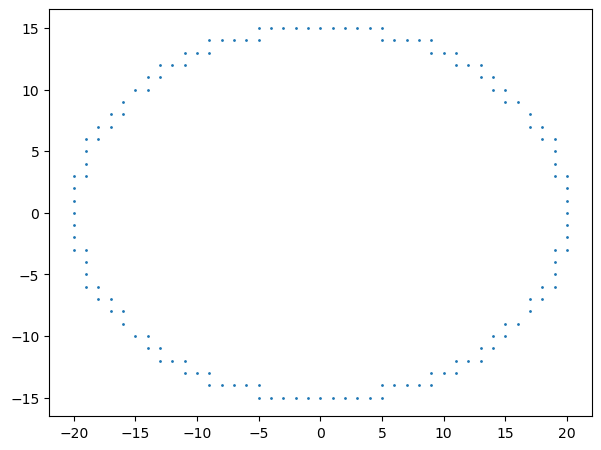

In [276]:
unique_a, phi_zhenya, mask, a = generate_elipse_zhenya(20,15)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.scatter(unique_a[0],unique_a[1], s = 1)

ax.set_aspect('equal')
fig.show()

print(len(shape[1]))

In [277]:
print(unique_a.shape,phi_zhenya.shape)
print(unique_points.shape,phi.shape)

(2, 136) (136,)
(2, 136) (136,)


In [278]:
print(phi-phi_zhenya)

[ 0.00000000e+00  2.77555756e-17  2.77555756e-17 -9.86076132e-32
  0.00000000e+00  0.00000000e+00  5.55111512e-17  0.00000000e+00
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-17  5.55111512e-17  0.00000000e+00  0.00000000e+00
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00 -1.11022302e-16  1.11022302e-16
  1.11022302e-16 -1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.22044605e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
def generate_elipse(r1,r2,npoints=1000):
    'Generates the set of points in the grid closest to an elipse with radii r1 and r2 and the angle of the normal vector.'
    theta = np.linspace(0, 2*np.pi, npoints)
    x = r1*np.cos(theta)
    y = r2*np.sin(theta)
    phi = np.arctan((r1/r2)*np.tan(theta))
    z = np.exp(1j*phi)

    boundary_points, indices = np.unique(np.round(np.stack((x, y))), axis = 1, return_inverse=True)

    # Calculate the sum of elements in z that correspond to the same value in mask
    sums_real = np.bincount(indices, weights=z.real)
    sums_imag = np.bincount(indices, weights=z.imag)
    
    # Calculate the count of elements in b that correspond to the same value in mask
    counts = np.bincount(indices)
    
    # Calculate the average of elements in b that correspond to the same value in mask
    normal_angles = np.angle((sums_real + 1j*sums_imag)/counts)
    

    
    return boundary_points, normal_angles